# Bill Classification EDA

**Dataset:** ACLU Anti-LGBTQ+ Legislation Tracker (2025)  
**Purpose:** Exploratory Data Analysis for LegalBERT training data preparation

## 1. Setup & Data Loading

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import ast
import warnings

warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)

# Plot style
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['figure.facecolor'] = 'white'

# Color palette for status
STATUS_COLORS = {
    'Passed into Law': '#d62728',  # Red - danger
    'Advancing': '#ff7f0e',         # Orange - warning
    'Introduced': '#ffbb78',        # Light orange
    'Defeated': '#2ca02c',          # Green - success
}

print("✅ Setup complete")

✅ Setup complete


In [2]:
# Load the classification dictionary
# Update this path to your local file location
df = pd.read_csv('bill_classification_dict.csv')

print(f"Loaded {len(df)} records")
print(f"Columns: {list(df.columns)}")

Loaded 561 records
Columns: ['state', 'bill_number', 'year', 'state_full', 'bill_number_raw', 'status', 'status_detail', 'issues_raw', 'issue_categories', 'label', 'source', 'legiscan_bill_id', 'legiscan_text_url']


In [3]:
# Preview the data
df.head(10)

,state,bill_number,year,state_full,bill_number_raw,status,status_detail,issues_raw,issue_categories,label,source,legiscan_bill_id,legiscan_text_url
0,MA,S350,2025,Massachusetts,S.350,Advancing,Committee recommended ought not to pass by committee,Restricting student & educator rights | School sports bans,"['sports', 'education']",harmful,aclu_tracker,NaN,NaN
1,IA,SF473,2025,Iowa,S.F.473,Advancing,"Legislative session adjourned, carries over to 2026",Religious exemptions | Weakening Civil Rights Laws,['religious_exemption'],harmful,aclu_tracker,NaN,NaN
2,PA,HB158,2025,Pennsylvania,H.B.158,Advancing,Re-referred to committee,Restricting student & educator rights | School sports bans,"['sports', 'education']",harmful,aclu_tracker,NaN,NaN
3,OH,HB172,2025,Ohio,H.B.172,Advancing,Third committee hearing,Healthcare age restrictions | Healthcare restrictions |,['healthcare'],harmful,aclu_tracker,NaN,NaN
4,NH,HB620,2025,New Hampshire,H.B.620,Defeated,Died on table; not retained for 2026 session,Religious exemptions | Weakening Civil Rights Laws,['religious_exemption'],harmful,aclu_tracker,NaN,NaN
5,NH,HB148,2025,New Hampshire,H.B.148,Defeated,Governor's veto sustained,Other civil rights restrictions | Weakening Civil Rights Laws,['other'],harmful,aclu_tracker,NaN,NaN
6,NH,HB712,2025,New Hampshire,H.B.712,Passed into Law,Governor signed,Healthcare age restrictions | Healthcare restrictions |,['healthcare'],harmful,aclu_tracker,NaN,NaN
7,NH,HB377,2025,New Hampshire,H.B.377,Passed into Law,Governor signed,Healthcare age restrictions | Healthcare restrictions |,['healthcare'],harmful,aclu_tracker,NaN,NaN
8,NH,SB38,2025,New Hampshire,S.B.38,Defeated,"Reported unfavorably by committee, not retained for 2026 session",Other civil rights restrictions | Weakening Civil Rights Laws,['other'],harmful,aclu_tracker,NaN,NaN
9,NH,SB211,2025,New Hampshire,S.B.211,Defeated,"Committee reported inexpedient to legislate, not retained for 2026 session",Restricting student & educator rights | School facilities bans | School sports bans,"['facilities', 'sports', 'education']",harmful,aclu_tracker,NaN,NaN


## 2. Basic Statistics

In [4]:
print("=" * 60)
print("DATASET OVERVIEW")
print("=" * 60)
print(f"Total bills:        {len(df)}")
print(f"Unique states:      {df['state'].nunique()}")
print(f"Year range:         {df['year'].min()} - {df['year'].max()}")
print(f"Label distribution: {df['label'].value_counts().to_dict()}")
print(f"Data source:        {df['source'].unique()[0]}")

DATASET OVERVIEW
Total bills:        561
Unique states:      49
Year range:         2025 - 2025
Label distribution: {'harmful': 561}
Data source:        aclu_tracker


In [5]:
# Data types and missing values
print("\nData Types:")
print(df.dtypes)
print("\nMissing Values:")
print(df.isnull().sum())


Data Types:
state                 object
bill_number           object
year                   int64
state_full            object
bill_number_raw       object
status                object
status_detail         object
issues_raw            object
issue_categories      object
label                 object
source                object
legiscan_bill_id     float64
legiscan_text_url    float64
dtype: object

Missing Values:
state                  0
bill_number            0
year                   0
state_full             0
bill_number_raw        0
status                 0
status_detail          0
issues_raw             0
issue_categories       0
label                  0
source                 0
legiscan_bill_id     561
legiscan_text_url    561
dtype: int64


## 3. Status Distribution

Understanding how many bills passed vs. failed is critical for assessing legislative impact.

In [6]:
# Status counts
status_counts = df['status'].value_counts()
print("Status Distribution:")
print("-" * 40)
for status, count in status_counts.items():
    pct = count / len(df) * 100
    print(f"{status:18s} {count:4d} ({pct:5.1f}%)")

Status Distribution:
----------------------------------------
Defeated            249 ( 44.4%)
Advancing           235 ( 41.9%)
Passed into Law      69 ( 12.3%)
Introduced            8 (  1.4%)


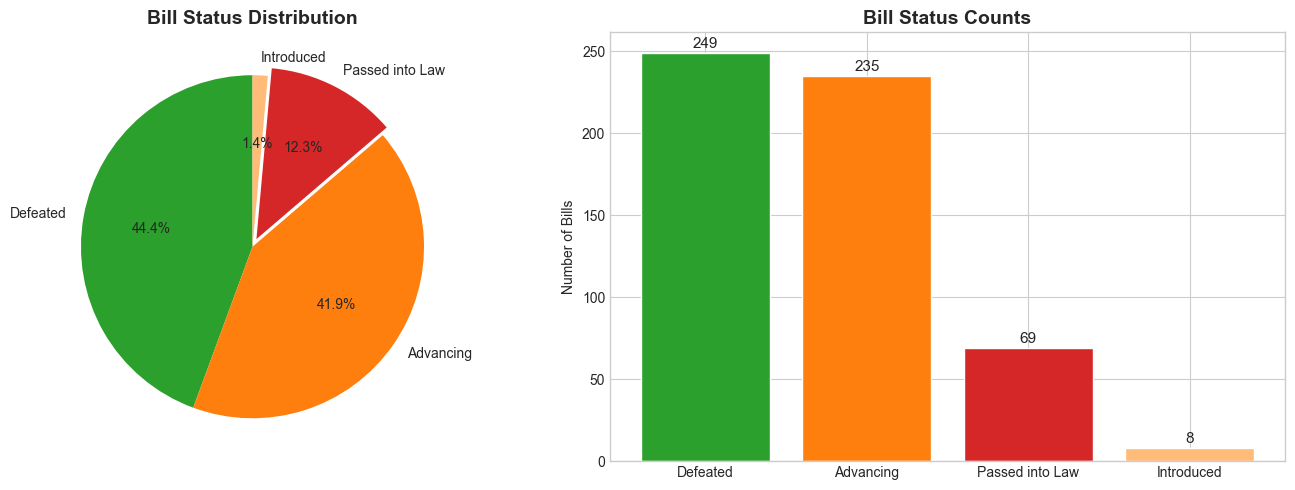


⚠️  69 bills have been signed into law!


In [7]:
# Pie chart for status distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Pie chart
colors = [STATUS_COLORS.get(s, '#999999') for s in status_counts.index]
explode = [0.05 if s == 'Passed into Law' else 0 for s in status_counts.index]

axes[0].pie(
    status_counts.values, 
    labels=status_counts.index,
    autopct='%1.1f%%',
    colors=colors,
    explode=explode,
    startangle=90
)
axes[0].set_title('Bill Status Distribution', fontsize=14, fontweight='bold')

# Bar chart
bars = axes[1].bar(status_counts.index, status_counts.values, color=colors, edgecolor='white')
axes[1].set_ylabel('Number of Bills')
axes[1].set_title('Bill Status Counts', fontsize=14, fontweight='bold')

# Add count labels on bars
for bar, count in zip(bars, status_counts.values):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 3, 
                 str(count), ha='center', fontsize=11)

plt.tight_layout()
plt.show()

print(f"\n⚠️  {status_counts.get('Passed into Law', 0)} bills have been signed into law!")

## 4. Geographic Distribution

Which states are introducing the most anti-LGBTQ+ legislation?

In [8]:
# State counts
state_counts = df['state'].value_counts()

print("Top 20 States by Bill Count:")
print("-" * 40)
for i, (state, count) in enumerate(state_counts.head(20).items()):
    pct = count / len(df) * 100
    bar = "█" * int(count / 3)
    print(f"{i+1:2d}. {state:3s} {count:3d} ({pct:4.1f}%) {bar}")

Top 20 States by Bill Count:
----------------------------------------
 1. TX   86 (15.3%) ████████████████████████████
 2. MO   38 ( 6.8%) ████████████
 3. WV   29 ( 5.2%) █████████
 4. OK   26 ( 4.6%) ████████
 5. MS   22 ( 3.9%) ███████
 6. IA   19 ( 3.4%) ██████
 7. MT   18 ( 3.2%) ██████
 8. TN   17 ( 3.0%) █████
 9. VA   17 ( 3.0%) █████
10. SC   17 ( 3.0%) █████
11. MN   16 ( 2.9%) █████
12. ID   16 ( 2.9%) █████
13. IL   15 ( 2.7%) █████
14. WY   14 ( 2.5%) ████
15. GA   13 ( 2.3%) ████
16. WI   12 ( 2.1%) ████
17. KY   12 ( 2.1%) ████
18. UT   11 ( 2.0%) ███
19. NJ   10 ( 1.8%) ███
20. CT   10 ( 1.8%) ███


In [9]:
# Check for missing states
all_states = {'AL','AK','AZ','AR','CA','CO','CT','DE','FL','GA','HI','ID','IL','IN','IA',
              'KS','KY','LA','ME','MD','MA','MI','MN','MS','MO','MT','NE','NV','NH','NJ',
              'NM','NY','NC','ND','OH','OK','OR','PA','RI','SC','SD','TN','TX','UT','VT',
              'VA','WA','WV','WI','WY','DC'}
present_states = set(df['state'].unique())
missing_states = all_states - present_states

print(f"\nStates with 0 bills in tracker: {', '.join(sorted(missing_states)) if missing_states else 'None'}")
print(f"States represented: {len(present_states)} / {len(all_states)}")


States with 0 bills in tracker: DC, NY, VT
States represented: 49 / 51


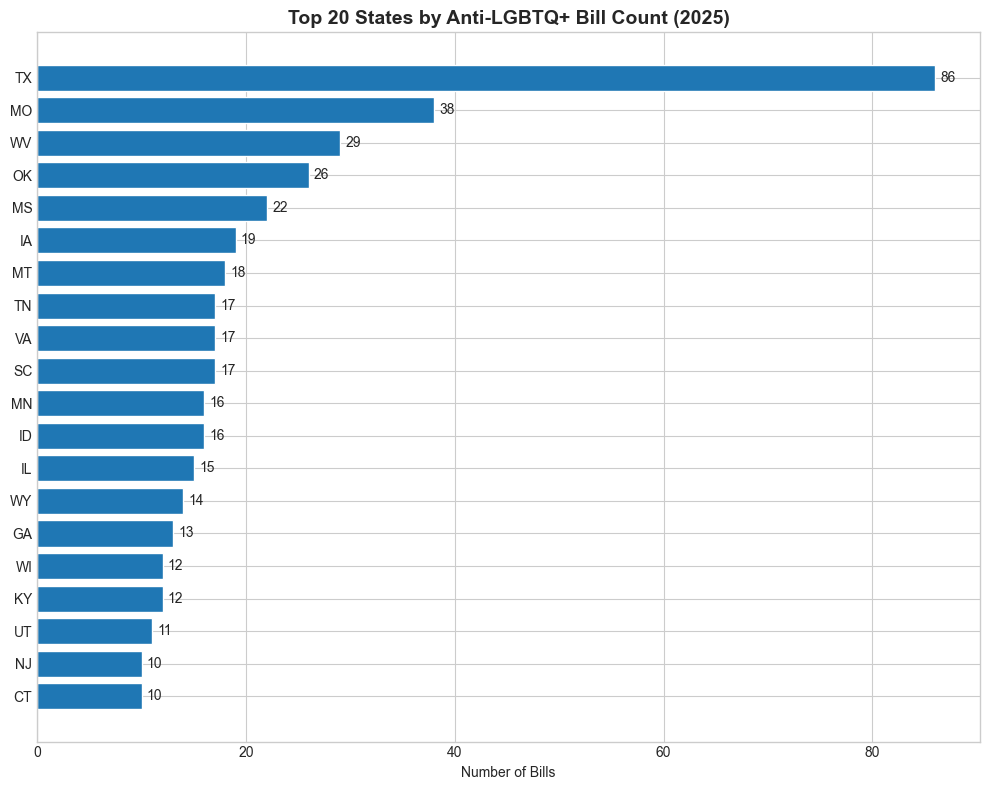

In [10]:
# Horizontal bar chart - Top 20 states
fig, ax = plt.subplots(figsize=(10, 8))

top_20 = state_counts.head(20)
y_pos = np.arange(len(top_20))

bars = ax.barh(y_pos, top_20.values, color='#1f77b4', edgecolor='white')
ax.set_yticks(y_pos)
ax.set_yticklabels(top_20.index)
ax.invert_yaxis()
ax.set_xlabel('Number of Bills')
ax.set_title('Top 20 States by Anti-LGBTQ+ Bill Count (2025)', fontsize=14, fontweight='bold')

# Add count labels
for i, v in enumerate(top_20.values):
    ax.text(v + 0.5, i, str(v), va='center', fontsize=10)

plt.tight_layout()
plt.show()

## 5. Issue Categories Analysis

What types of restrictions are being proposed?

In [11]:
# Parse issue categories (stored as string representation of lists)
def parse_categories(cat_str):
    """Safely parse string representation of list."""
    try:
        return ast.literal_eval(cat_str)
    except:
        return []

# Count all categories
all_categories = []
for cat_str in df['issue_categories']:
    all_categories.extend(parse_categories(cat_str))

category_counts = Counter(all_categories)

print("Issue Category Distribution:")
print("-" * 50)
for cat, count in category_counts.most_common():
    pct = count / len(df) * 100
    bar = "█" * int(pct / 3)
    print(f"{cat:25s} {count:4d} ({pct:5.1f}%) {bar}")

Issue Category Distribution:
--------------------------------------------------
education                  250 ( 44.6%) ██████████████
healthcare                 127 ( 22.6%) ███████
other                       93 ( 16.6%) █████
sports                      86 ( 15.3%) █████
schools_speech              66 ( 11.8%) ███
facilities                  60 ( 10.7%) ███
religious_exemption         58 ( 10.3%) ███
identity_documents          57 ( 10.2%) ███
expression                  31 (  5.5%) █
public_accommodations       21 (  3.7%) █


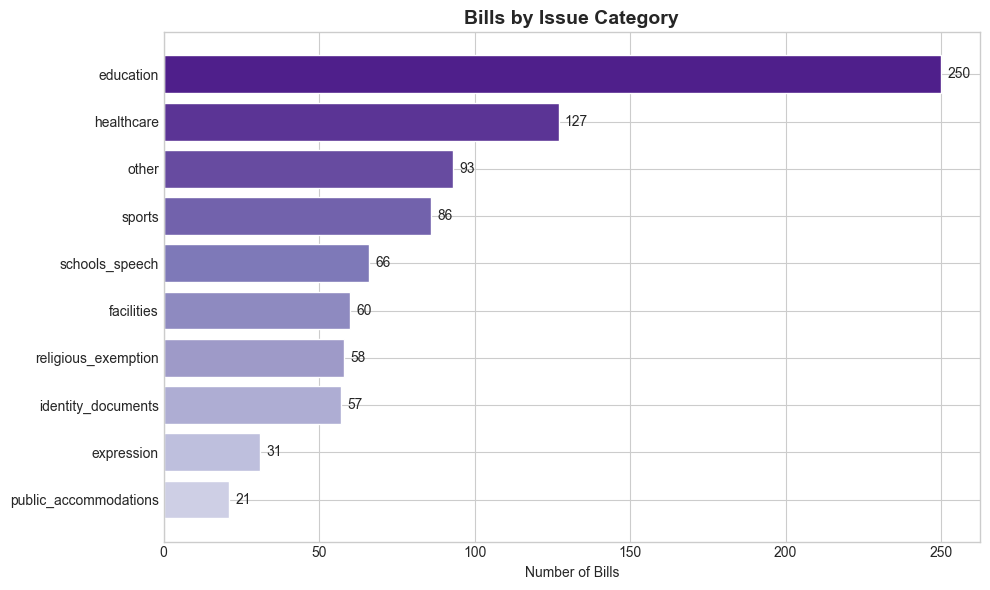

In [12]:
# Visualize issue categories
cat_df = pd.DataFrame(category_counts.most_common(), columns=['category', 'count'])

fig, ax = plt.subplots(figsize=(10, 6))

colors = plt.cm.Purples(np.linspace(0.3, 0.9, len(cat_df)))
bars = ax.barh(cat_df['category'], cat_df['count'], color=colors[::-1], edgecolor='white')
ax.invert_yaxis()
ax.set_xlabel('Number of Bills')
ax.set_title('Bills by Issue Category', fontsize=14, fontweight='bold')

for i, v in enumerate(cat_df['count']):
    ax.text(v + 2, i, str(v), va='center', fontsize=10)

plt.tight_layout()
plt.show()

In [13]:
# Raw issue tags (more granular)
all_issues_raw = []
for issues in df['issues_raw'].dropna():
    for issue in str(issues).split('|'):
        issue = issue.strip()
        if issue:
            all_issues_raw.append(issue)

issue_raw_counts = Counter(all_issues_raw)

print("\nTop 15 Specific Issue Tags:")
print("-" * 60)
for issue, count in issue_raw_counts.most_common(15):
    pct = count / len(df) * 100
    print(f"{issue[:45]:45s} {count:4d} ({pct:5.1f}%)")


Top 15 Specific Issue Tags:
------------------------------------------------------------
Restricting student & educator rights          250 ( 44.6%)
Other anti-LGBTQ bills                         140 ( 25.0%)
Healthcare restrictions                        127 ( 22.6%)
Weakening Civil Rights Laws                    101 ( 18.0%)
School sports bans                              86 ( 15.3%)
Other school restrictions                       85 ( 15.2%)
Other healthcare barriers                       67 ( 11.9%)
School facilities bans                          60 ( 10.7%)
Healthcare age restrictions                     59 ( 10.5%)
Religious exemptions                            58 ( 10.3%)
Curriculum censorship                           47 (  8.4%)
Re-definition of sex                            37 (  6.6%)
Forced outing in schools                        36 (  6.4%)
Barriers to accurate IDs                        32 (  5.7%)
Free speech & expression bans                   31 (  5.5%)


## 6. Pass Rate Analysis

Which states are most successful at passing harmful legislation?

In [14]:
# Calculate pass rates by state
passed_df = df[df['status'] == 'Passed into Law']
passed_by_state = passed_df['state'].value_counts()
total_by_state = df['state'].value_counts()

# Create pass rate dataframe
pass_rate_data = []
for state in passed_by_state.index:
    passed = passed_by_state[state]
    total = total_by_state[state]
    rate = (passed / total) * 100
    pass_rate_data.append({
        'state': state,
        'passed': passed,
        'total': total,
        'pass_rate': rate
    })

pass_rate_df = pd.DataFrame(pass_rate_data).sort_values('pass_rate', ascending=False)

print("States with Bills Passed into Law (sorted by pass rate):")
print("-" * 55)
print(f"{'State':<6} {'Passed':>8} {'Total':>8} {'Pass Rate':>12}")
print("-" * 55)
for _, row in pass_rate_df.iterrows():
    print(f"{row['state']:<6} {row['passed']:>8} {row['total']:>8} {row['pass_rate']:>11.1f}%")

States with Bills Passed into Law (sorted by pass rate):
-------------------------------------------------------
State    Passed    Total    Pass Rate
-------------------------------------------------------
AR            6        9        66.7%
MT            9       18        50.0%
WY            7       14        50.0%
UT            5       11        45.5%
ID            7       16        43.8%
KS            2        5        40.0%
KY            4       12        33.3%
NV            1        3        33.3%
ND            1        3        33.3%
NH            2        7        28.6%
NE            1        4        25.0%
GA            3       13        23.1%
IN            2        9        22.2%
TN            3       17        17.6%
SD            1        6        16.7%
NC            1        7        14.3%
AL            1        7        14.3%
WV            4       29        13.8%
OK            3       26        11.5%
IA            2       19        10.5%
MS            1       22         

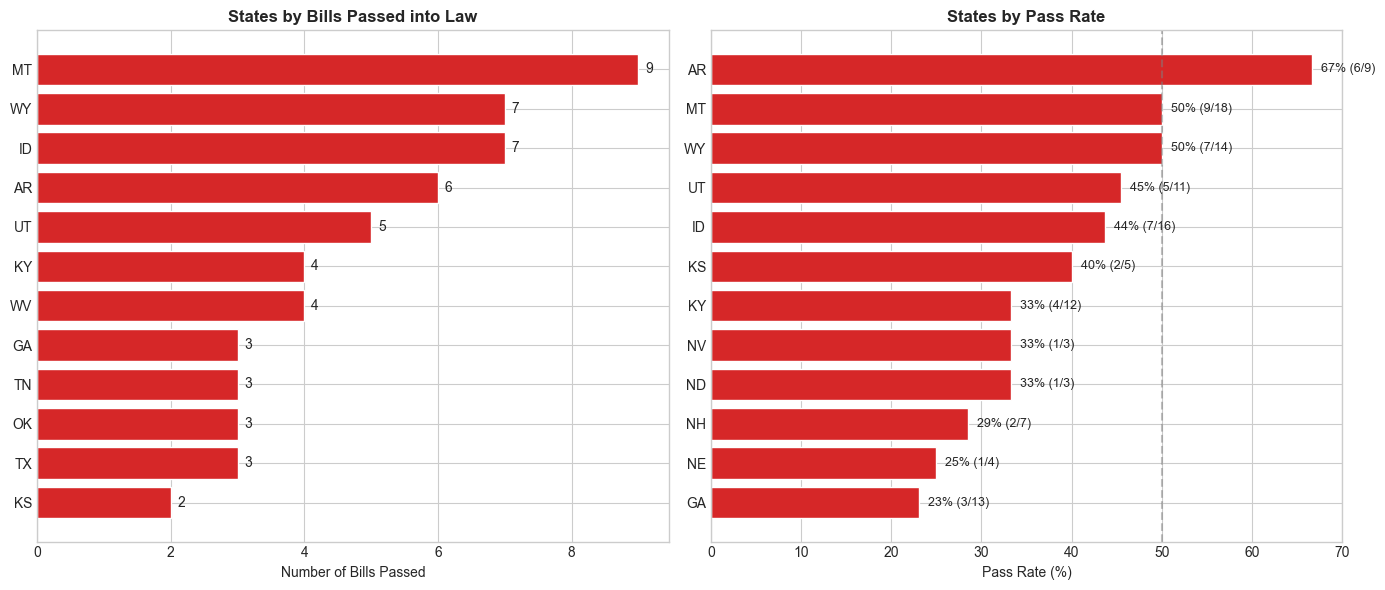


📊 Total bills passed into law: 69
📊 States with at least 1 law passed: 22


In [15]:
# Visualize pass rates
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Left: States by number of bills passed
top_passed = pass_rate_df.nlargest(12, 'passed')
axes[0].barh(top_passed['state'], top_passed['passed'], color='#d62728', edgecolor='white')
axes[0].invert_yaxis()
axes[0].set_xlabel('Number of Bills Passed')
axes[0].set_title('States by Bills Passed into Law', fontsize=12, fontweight='bold')
for i, (_, row) in enumerate(top_passed.iterrows()):
    axes[0].text(row['passed'] + 0.1, i, str(row['passed']), va='center')

# Right: States by pass rate
top_rate = pass_rate_df.nlargest(12, 'pass_rate')
bars = axes[1].barh(top_rate['state'], top_rate['pass_rate'], color='#d62728', edgecolor='white')
axes[1].invert_yaxis()
axes[1].set_xlabel('Pass Rate (%)')
axes[1].set_title('States by Pass Rate', fontsize=12, fontweight='bold')
axes[1].axvline(x=50, color='gray', linestyle='--', alpha=0.5, label='50%')

# Add labels with passed/total
for i, (_, row) in enumerate(top_rate.iterrows()):
    label = f"{row['pass_rate']:.0f}% ({int(row['passed'])}/{int(row['total'])})"
    axes[1].text(row['pass_rate'] + 1, i, label, va='center', fontsize=9)

plt.tight_layout()
plt.show()

print(f"\n📊 Total bills passed into law: {len(passed_df)}")
print(f"📊 States with at least 1 law passed: {len(pass_rate_df)}")

## 7. Status × Issue Category Crosstab

Which issue categories have the highest success rate for harmful legislation?

In [16]:
# Explode categories for crosstab analysis
exploded_rows = []
for _, row in df.iterrows():
    cats = parse_categories(row['issue_categories'])
    for cat in cats:
        exploded_rows.append({'category': cat, 'status': row['status'], 'state': row['state']})

exploded_df = pd.DataFrame(exploded_rows)

# Create crosstab
crosstab = pd.crosstab(exploded_df['category'], exploded_df['status'])
crosstab = crosstab.reindex(columns=['Passed into Law', 'Advancing', 'Introduced', 'Defeated'])

print("Status × Issue Category Crosstab:")
print(crosstab)

Status × Issue Category Crosstab:
status                 Passed into Law  Advancing  Introduced  Defeated
category                                                               
education                           30        107           8       105
expression                           3         16           0        12
facilities                          13         30           0        17
healthcare                          22         54           0        51
identity_documents                   6         34           0        17
other                                8         32           0        53
public_accommodations                6         10           0         5
religious_exemption                  9         21           0        28
schools_speech                       5         22           3        36
sports                               6         42           1        37


In [17]:
# Calculate pass rate by category
crosstab_pct = crosstab.div(crosstab.sum(axis=1), axis=0) * 100

print("\nPercentage Distribution by Category:")
print(crosstab_pct.round(1))


Percentage Distribution by Category:
status                 Passed into Law  Advancing  Introduced  Defeated
category                                                               
education                         12.0       42.8         3.2      42.0
expression                         9.7       51.6         0.0      38.7
facilities                        21.7       50.0         0.0      28.3
healthcare                        17.3       42.5         0.0      40.2
identity_documents                10.5       59.6         0.0      29.8
other                              8.6       34.4         0.0      57.0
public_accommodations             28.6       47.6         0.0      23.8
religious_exemption               15.5       36.2         0.0      48.3
schools_speech                     7.6       33.3         4.5      54.5
sports                             7.0       48.8         1.2      43.0


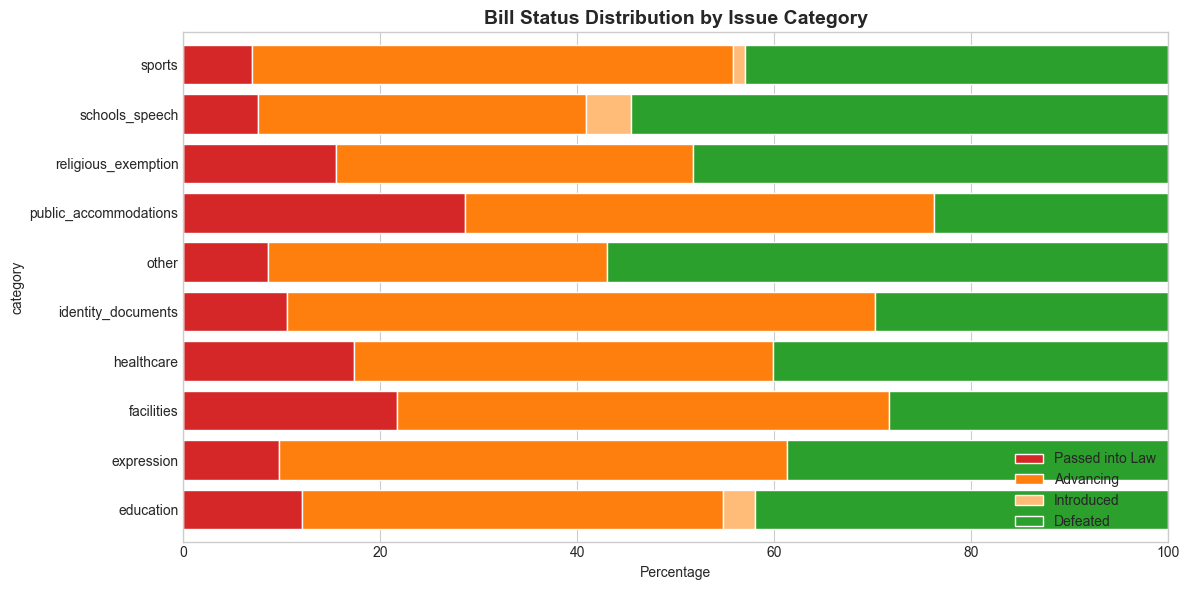


🔴 Categories with highest pass rates:
   public_accommodations: 28.6%
   facilities: 21.7%
   healthcare: 17.3%
   religious_exemption: 15.5%
   education: 12.0%


In [18]:
# Stacked bar chart
fig, ax = plt.subplots(figsize=(12, 6))

crosstab_pct.plot(
    kind='barh', 
    stacked=True, 
    ax=ax,
    color=[STATUS_COLORS[c] for c in crosstab_pct.columns],
    edgecolor='white',
    width=0.8
)

ax.set_xlabel('Percentage')
ax.set_title('Bill Status Distribution by Issue Category', fontsize=14, fontweight='bold')
ax.legend(loc='lower right', fontsize=10)
ax.set_xlim(0, 100)

plt.tight_layout()
plt.show()

# Highlight highest pass rates
print("\n🔴 Categories with highest pass rates:")
pass_rates = (crosstab['Passed into Law'] / crosstab.sum(axis=1) * 100).sort_values(ascending=False)
for cat, rate in pass_rates.head(5).items():
    print(f"   {cat}: {rate:.1f}%")

## 8. Issue Category Combinations

Many bills target multiple areas simultaneously.

In [19]:
# Analyze category combinations
combo_counts = df['issue_categories'].value_counts()

print("Most Common Issue Category Combinations:")
print("-" * 50)
for combo, count in combo_counts.head(15).items():
    pct = count / len(df) * 100
    print(f"{count:4d} ({pct:4.1f}%)  {combo}")

Most Common Issue Category Combinations:
--------------------------------------------------
 102 (18.2%)  ['healthcare']
  93 (16.6%)  ['other']
  66 (11.8%)  ['sports', 'education']
  57 (10.2%)  ['schools_speech', 'education']
  41 ( 7.3%)  ['education']
  39 ( 7.0%)  ['identity_documents']
  35 ( 6.2%)  ['religious_exemption']
  23 ( 4.1%)  ['facilities', 'education']
  19 ( 3.4%)  ['expression']
  18 ( 3.2%)  ['religious_exemption', 'healthcare']
  15 ( 2.7%)  ['facilities', 'sports', 'education']
  10 ( 1.8%)  ['expression', 'education']
   7 ( 1.2%)  ['facilities', 'public_accommodations', 'education']
   6 ( 1.1%)  ['facilities', 'identity_documents', 'education']
   4 ( 0.7%)  ['facilities', 'identity_documents', 'public_accommodations', 'education']



Number of Issue Categories per Bill:
num_categories
1    333
2    180
3     38
4      8
5      2
Name: count, dtype: int64


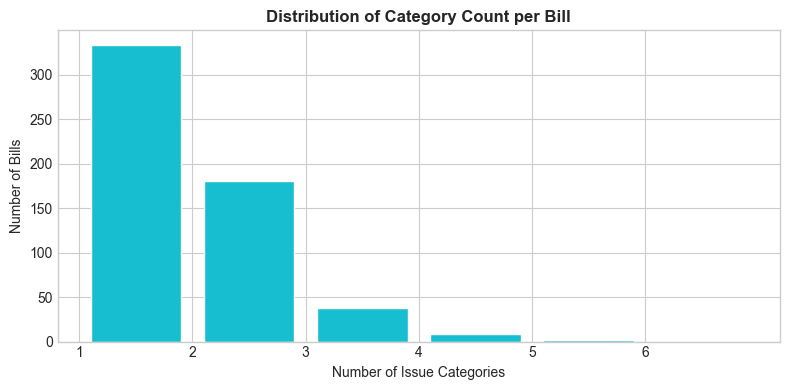

In [20]:
# Count number of categories per bill
df['num_categories'] = df['issue_categories'].apply(lambda x: len(parse_categories(x)))

print("\nNumber of Issue Categories per Bill:")
print(df['num_categories'].value_counts().sort_index())

fig, ax = plt.subplots(figsize=(8, 4))
df['num_categories'].hist(bins=range(1, 8), ax=ax, color='#17becf', edgecolor='white', rwidth=0.8)
ax.set_xlabel('Number of Issue Categories')
ax.set_ylabel('Number of Bills')
ax.set_title('Distribution of Category Count per Bill', fontsize=12, fontweight='bold')
ax.set_xticks(range(1, 7))
plt.tight_layout()
plt.show()

## 9. Bill Number Format Analysis

Important for LegiScan API matching.

In [21]:
# Analyze bill number formats
import re

def extract_bill_prefix(bill_num):
    """Extract prefix from normalized bill number."""
    if pd.isna(bill_num):
        return 'Unknown'
    match = re.match(r'^([A-Z]+)', str(bill_num))
    return match.group(1) if match else 'Unknown'

df['bill_prefix'] = df['bill_number'].apply(extract_bill_prefix)

prefix_counts = df['bill_prefix'].value_counts()

print("Bill Number Prefixes:")
print("-" * 40)
for prefix, count in prefix_counts.items():
    pct = count / len(df) * 100
    print(f"{prefix:8s} {count:4d} ({pct:5.1f}%)")

Bill Number Prefixes:
----------------------------------------
HB        269 ( 48.0%)
SB        190 ( 33.9%)
H          21 (  3.7%)
SF         21 (  3.7%)
AB         13 (  2.3%)
HF         12 (  2.1%)
S           9 (  1.6%)
A           7 (  1.2%)
HSB         5 (  0.9%)
LD          4 (  0.7%)
LB          4 (  0.7%)
HCR         1 (  0.2%)
HD          1 (  0.2%)
PS          1 (  0.2%)
SSB         1 (  0.2%)
HR          1 (  0.2%)
HJ          1 (  0.2%)


In [22]:
# Show normalization examples
print("\nBill Number Normalization Examples:")
print("-" * 50)
samples = df[['bill_number_raw', 'bill_number', 'state']].drop_duplicates().sample(15, random_state=42)
for _, row in samples.iterrows():
    print(f"{row['state']:3s}  '{row['bill_number_raw']:25s}' -> '{row['bill_number']}'")


Bill Number Normalization Examples:
--------------------------------------------------
CT   'H.B.6178                 ' -> 'HB6178'
WV   'H.B.2375                 ' -> 'HB2375'
UT   'H.B.283                  ' -> 'HB283'
NC   'H606                     ' -> 'H606'
MN   'S.F.1883                 ' -> 'SF1883'
IN   'H.B.1041                 ' -> 'HB1041'
IA   'S.F.236                  ' -> 'SF236'
CT   'H.B.5336                 ' -> 'HB5336'
IN   'H.B.1412                 ' -> 'HB1412'
SC   'H.B.3094                 ' -> 'HB3094'
IL   'H.B.1204                 ' -> 'HB1204'
VA   'S.B. 671                 ' -> 'SB671'
TN   'H.B.0064                 ' -> 'HB64'
TX   'S.B. 2920                ' -> 'SB2920'
IL   'H.B.1214                 ' -> 'HB1214'


## 10. Summary Statistics & ML Considerations

In [23]:
print("=" * 70)
print("SUMMARY: KEY INSIGHTS FOR ARC RADIUS")
print("=" * 70)

print(f"""
📊 DATASET OVERVIEW
   • {len(df)} anti-LGBTQ+ bills tracked across {df['state'].nunique()} states (2025)
   • Source: ACLU Legislation Tracker
   • All bills labeled as 'harmful'

📋 STATUS BREAKDOWN
   • Defeated:        {status_counts.get('Defeated', 0):3d} ({status_counts.get('Defeated', 0)/len(df)*100:.1f}%)
   • Advancing:       {status_counts.get('Advancing', 0):3d} ({status_counts.get('Advancing', 0)/len(df)*100:.1f}%)
   • Passed into Law: {status_counts.get('Passed into Law', 0):3d} ({status_counts.get('Passed into Law', 0)/len(df)*100:.1f}%) ⚠️
   • Introduced:      {status_counts.get('Introduced', 0):3d} ({status_counts.get('Introduced', 0)/len(df)*100:.1f}%)

🗺️  GEOGRAPHIC HOTSPOTS
   • Texas leads with {state_counts.get('TX', 0)} bills (but only {pass_rate_df[pass_rate_df['state']=='TX']['pass_rate'].values[0] if 'TX' in pass_rate_df['state'].values else 0:.1f}% pass rate)
   • Highest pass rates: AR ({pass_rate_df[pass_rate_df['state']=='AR']['pass_rate'].values[0]:.0f}%), MT ({pass_rate_df[pass_rate_df['state']=='MT']['pass_rate'].values[0]:.0f}%), WY ({pass_rate_df[pass_rate_df['state']=='WY']['pass_rate'].values[0]:.0f}%)
   • {len(missing_states)} states with no bills in tracker: {', '.join(sorted(missing_states))}

🏷️  ISSUE FOCUS
   • Education/students: {category_counts.get('education', 0)} bills ({category_counts.get('education', 0)/len(df)*100:.1f}%)
   • Healthcare:         {category_counts.get('healthcare', 0)} bills ({category_counts.get('healthcare', 0)/len(df)*100:.1f}%)
   • Sports bans:        {category_counts.get('sports', 0)} bills ({category_counts.get('sports', 0)/len(df)*100:.1f}%)
   • Facilities:         {category_counts.get('facilities', 0)} bills ({category_counts.get('facilities', 0)/len(df)*100:.1f}%)
""")

SUMMARY: KEY INSIGHTS FOR ARC RADIUS

📊 DATASET OVERVIEW
   • 561 anti-LGBTQ+ bills tracked across 49 states (2025)
   • Source: ACLU Legislation Tracker
   • All bills labeled as 'harmful'

📋 STATUS BREAKDOWN
   • Defeated:        249 (44.4%)
   • Advancing:       235 (41.9%)
   • Passed into Law:  69 (12.3%) ⚠️
   • Introduced:        8 (1.4%)

🗺️  GEOGRAPHIC HOTSPOTS
   • Texas leads with 86 bills (but only 3.5% pass rate)
   • Highest pass rates: AR (67%), MT (50%), WY (50%)
   • 3 states with no bills in tracker: DC, NY, VT

🏷️  ISSUE FOCUS
   • Education/students: 250 bills (44.6%)
   • Healthcare:         127 bills (22.6%)
   • Sports bans:        86 bills (15.3%)
   • Facilities:         60 bills (10.7%)



In [24]:
print("""
🤖 ML TRAINING CONSIDERATIONS
══════════════════════════════════════════════════════════════════════

1. CLASS IMBALANCE
   • Current: 561 harmful bills, 0 protective bills
   • Need: ~300-500 protective bills for balanced binary classification
   • Sources for protective bills:
     - MAP PDFs (anti-discrimination laws)
     - State equality acts
     - LGBTQ+ inclusive policies

2. STRATIFIED SAMPLING
   Consider stratifying train/val/test splits by:
   • Issue category (healthcare vs education vs sports)
   • Geographic region (to avoid state-specific biases)
   • Bill status (focus on passed laws?)

3. FEATURE ENGINEERING
   Available features for classification:
   • Bill text (from LegiScan) - primary input for LegalBERT
   • Issue categories (multi-label auxiliary task?)
   • State (potential bias to control for)
   • Bill type prefix (HB, SB, etc.)

4. NEXT STEPS
   □ Collect protective bills for balanced dataset
   □ Match bills to LegiScan for full text
   □ Create train/val/test splits (70/15/15)
   □ Fine-tune LegalBERT for binary classification
""")


🤖 ML TRAINING CONSIDERATIONS
══════════════════════════════════════════════════════════════════════

1. CLASS IMBALANCE
   • Current: 561 harmful bills, 0 protective bills
   • Need: ~300-500 protective bills for balanced binary classification
   • Sources for protective bills:
     - MAP PDFs (anti-discrimination laws)
     - State equality acts
     - LGBTQ+ inclusive policies

2. STRATIFIED SAMPLING
   Consider stratifying train/val/test splits by:
   • Issue category (healthcare vs education vs sports)
   • Geographic region (to avoid state-specific biases)
   • Bill status (focus on passed laws?)

3. FEATURE ENGINEERING
   Available features for classification:
   • Bill text (from LegiScan) - primary input for LegalBERT
   • Issue categories (multi-label auxiliary task?)
   • State (potential bias to control for)
   • Bill type prefix (HB, SB, etc.)

4. NEXT STEPS
   □ Collect protective bills for balanced dataset
   □ Match bills to LegiScan for full text
   □ Create train/val/

---

## Next Steps

1. **Collect protective bills** - Need balanced training data
2. **LegiScan API integration** - Get full bill text for each record
3. **LegalBERT fine-tuning** - Binary classifier (harmful/protective)
4. **Build FastAPI backend** - Serve predictions + RAG chatbot